In [ ]:
!pip install beautifulsoup4 requests pandas

In [ ]:

import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

final = pd.DataFrame()

for j in range(1,201):
  webpage = requests.get(f'https://markets.businessinsider.com/news/infy-stock?p={j}&')
  soup = BeautifulSoup(webpage.content, 'lxml')
  company = soup.find_all('div', class_="latest-news__story")
  news = []
  date = []

  for i in company:
    try:
      news.append(i.find('a', class_="news-link").text.strip())
    except:
      news.append(np.nan)
    try:
      date.append(i.find(class_="latest-news__date").text.strip())
    except:
      date.append(np.nan)

  df = pd.DataFrame({'news': news, 'date': date})
  final = pd.concat([final,df], ignore_index=True)

from google.colab import files
from datetime import datetime, timedelta


def convert_to_absolute_date(relative_date):
  if relative_date is not None and isinstance(relative_date, str):
    if 'd' in relative_date:
      days_ago = int(relative_date.replace(',','').replace('d',''))
      absolute_date = datetime.now() - timedelta(days=days_ago)
      return absolute_date.strftime('%Y-%m-%d') # Format as yyyy-mm-dd
    elif 'h' in relative_date:
      hours_ago = int(relative_date.replace(',','').replace('h','')) # Extract the number of hours (remove 'h')
      absolute_date = datetime.now() - timedelta(hours=hours_ago) # Compute the absolute date
    return absolute_date.strftime('%Y-%m-%d') # Format as yyyy-mm-dd
    return relative_date # Return the original value if it's not a string or is None

final['date'] = final['date'].apply(convert_to_absolute_date)
print("\nDataFrame after converting dates:")
final.rename(columns={'date': 'Date'}, inplace=True)
print("\nDataFrame after renaming 'date' to 'Date':")



final.to_csv('news.csv', index=False)


files.download('news.csv')


DataFrame after converting dates:

DataFrame after renaming 'date' to 'Date':


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from google.colab import files

# Function to fetch stock data
def fetch_stock_data(ticker, period='1mo', interval='1d'):
    # Fetch historical market data
    try:
        # Initialize Ticker object
        stock = yf.Ticker(ticker)

        # Fetch historical market data
        data = stock.history(period=period, interval=interval)

        # Reset index to bring the date column into the DataFrame
        data.reset_index(inplace=True)

        # Convert the 'Date' column to datetime without time
        data['Date'] = pd.to_datetime(data['Date']).dt.date

        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
ticker = 'INFY'
period = '10y'    # Fetch data for the last 10 years
interval = '1d'   # Daily data

# Fetch stock data for Apple Inc.
stock_data = fetch_stock_data(ticker, period=period, interval=interval)

# Convert to DataFrame and save to CSV
if stock_data is not None:
    stock_data_df = pd.DataFrame(stock_data)

    # Save DataFrame to a CSV file
    csv_file_path = f"{ticker}_stock_data.csv"
    stock_data_df.to_csv(csv_file_path, index=False)  # Save without index
    print(f"Stock data saved to {csv_file_path}")

    # Download the CSV file to your local machine
    files.download(csv_file_path)
else:
    print("Failed to fetch stock data.")

Stock data saved to INFY_stock_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from resources
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
df1= pd.read_csv('news.csv')
df2= pd.read_csv('INFY_stock_data.csv')

In [ ]:
df1.head(3)

,news,Date
0,3 Emerging Market Stocks to Buy Before They Ta...,2024-06-16
1,Hidden Treasures: 7 Undervalued Tech Stocks to...,2024-05-17
2,Infosys enters multi-year strategic collaborat...,2024-05-14


In [ ]:
df1.shape


(1254, 2)

In [ ]:
df2.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-06-19,5.313002,5.322634,5.221499,5.262916,10291200,0.0,0.0
1,2014-06-20,5.270621,5.294701,5.218608,5.260026,11973600,0.0,0.0
2,2014-06-23,5.182970,5.182970,5.114583,5.150221,8711200,0.0,0.0


In [ ]:
df2.shape

(2517, 8)

In [ ]:
#Merge the data set on the date field
merge = df1.merge(df2, how='inner', on='Date')

In [ ]:
merge

,news,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,Hidden Treasures: 7 Undervalued Tech Stocks to...,2024-05-17,16.809438,16.829042,16.682021,16.789835,7986000,0.0,0.0
1,Infosys enters multi-year strategic collaborat...,2024-05-14,16.662417,16.672219,16.525198,16.613411,9395500,0.0,0.0
2,Analysts Are Bullish on These Technology Stock...,2024-04-23,16.956460,17.025071,16.789836,16.819241,8832400,0.0,0.0
3,Infosys: A Titan in Digital Transformation and...,2024-04-22,16.711423,17.044672,16.623211,16.956459,19944700,0.0,0.0
4,4 Analysts Have This To Say About Infosys,2024-04-19,16.427184,16.613412,16.348773,16.476191,16181900,0.0,0.0
...,...,...,...,...,...,...,...,...,...
991,"Infosys falls on profit-taking, earnings details",2014-07-14,5.172375,5.210903,5.152148,5.169486,15649600,0.0,0.0
992,Nifty gains after Infosys earnings beat estimates,2014-07-11,5.408359,5.442071,5.141553,5.222462,31959200,0.0,0.0
993,IT stocks gain after Infosys earnings beat est...,2014-07-11,5.408359,5.442071,5.141553,5.222462,31959200,0.0,0.0
994,"Infosys first quarter profit up 21.6 pct, beat...",2014-07-11,5.408359,5.442071,5.141553,5.222462,31959200,0.0,0.0


In [ ]:
#add features
#polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity
#subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


In [ ]:
merge['polarity']=merge['news'].apply(getpolarity)
merge['subjectivity']=merge['news'].apply(getsubjectivity)
merge.head(3)

,news,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,polarity,subjectivity
0,Hidden Treasures: 7 Undervalued Tech Stocks to...,2024-05-17,16.809438,16.829042,16.682021,16.789835,7986000,0.0,0.0,-0.166667,0.333333
1,Infosys enters multi-year strategic collaborat...,2024-05-14,16.662417,16.672219,16.525198,16.613411,9395500,0.0,0.0,0.250000,0.333333
2,Analysts Are Bullish on These Technology Stock...,2024-04-23,16.956460,17.025071,16.789836,16.819241,8832400,0.0,0.0,0.000000,0.000000


In [ ]:
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
compound=[]
neg=[]
neu=[]
pos=[]
SIA=0

for i in range(0,len(merge['news'])):
  SIA=getSIA(merge['news'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

In [ ]:
merge['compound']=compound
merge['neg']=neg
merge['neu']=neu
merge['pos']=pos

In [ ]:
merge.head(3)

,news,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,polarity,subjectivity,compound,neg,neu,pos
0,Hidden Treasures: 7 Undervalued Tech Stocks to...,2024-05-17,16.809438,16.829042,16.682021,16.789835,7986000,0.0,0.0,-0.166667,0.333333,0.4215,0.0,0.763,0.237
1,Infosys enters multi-year strategic collaborat...,2024-05-14,16.662417,16.672219,16.525198,16.613411,9395500,0.0,0.0,0.250000,0.333333,0.0000,0.0,1.000,0.000
2,Analysts Are Bullish on These Technology Stock...,2024-04-23,16.956460,17.025071,16.789836,16.819241,8832400,0.0,0.0,0.000000,0.000000,0.0000,0.0,1.000,0.000


In [ ]:
list_columns= ['Open','High','Low','Close','Volume','polarity','subjectivity','compound','neg','neu','pos']
df=merge[list_columns]
df

,Open,High,Low,Close,Volume,polarity,subjectivity,compound,neg,neu,pos
0,16.809438,16.829042,16.682021,16.789835,7986000,-0.166667,0.333333,0.4215,0.0,0.763,0.237
1,16.662417,16.672219,16.525198,16.613411,9395500,0.250000,0.333333,0.0000,0.0,1.000,0.000
2,16.956460,17.025071,16.789836,16.819241,8832400,0.000000,0.000000,0.0000,0.0,1.000,0.000
3,16.711423,17.044672,16.623211,16.956459,19944700,0.000000,0.000000,0.4939,0.0,0.741,0.259
4,16.427184,16.613412,16.348773,16.476191,16181900,0.000000,0.000000,0.0000,0.0,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
991,5.172375,5.210903,5.152148,5.169486,15649600,0.000000,0.000000,0.0000,0.0,1.000,0.000
992,5.408359,5.442071,5.141553,5.222462,31959200,0.000000,0.000000,0.6249,0.0,0.495,0.505
993,5.408359,5.442071,5.141553,5.222462,31959200,0.000000,0.000000,0.5267,0.0,0.673,0.327
994,5.408359,5.442071,5.141553,5.222462,31959200,0.250000,0.333333,0.4404,0.0,0.734,0.266


In [ ]:
df['Labels'] = (df['Close'].shift(-1) >= df['Close']).astype(int)

# Drop the last row with NaN in 'labels'
df = df.dropna(subset=['Labels'])
df

<ipython-input-55-353053e12178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels'] = (df['Close'].shift(-1) >= df['Close']).astype(int)


,Open,High,Low,Close,Volume,polarity,subjectivity,compound,neg,neu,pos,Labels
0,16.809438,16.829042,16.682021,16.789835,7986000,-0.166667,0.333333,0.4215,0.0,0.763,0.237,0
1,16.662417,16.672219,16.525198,16.613411,9395500,0.250000,0.333333,0.0000,0.0,1.000,0.000,1
2,16.956460,17.025071,16.789836,16.819241,8832400,0.000000,0.000000,0.0000,0.0,1.000,0.000,1
3,16.711423,17.044672,16.623211,16.956459,19944700,0.000000,0.000000,0.4939,0.0,0.741,0.259,0
4,16.427184,16.613412,16.348773,16.476191,16181900,0.000000,0.000000,0.0000,0.0,1.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
991,5.172375,5.210903,5.152148,5.169486,15649600,0.000000,0.000000,0.0000,0.0,1.000,0.000,1
992,5.408359,5.442071,5.141553,5.222462,31959200,0.000000,0.000000,0.6249,0.0,0.495,0.505,1
993,5.408359,5.442071,5.141553,5.222462,31959200,0.000000,0.000000,0.5267,0.0,0.673,0.327,1
994,5.408359,5.442071,5.141553,5.222462,31959200,0.250000,0.333333,0.4404,0.0,0.734,0.266,0


In [ ]:
#Create feature dataset
x = df
x = np.array(x.drop(['Labels'], axis=1))
#Create the target dataset
y = np.array(df['Labels'])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
model=LinearDiscriminantAnalysis()
model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
from zlib import DEF_BUF_SIZE
#model prediction
y_pred=model.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

,Open,High,Low,Close,Volume,polarity,subjectivity,compound,neg,neu,pos,Labels,signal,position,portfolio_value,daily_return,cumulative_return,peak,drawdown
993,5.408359,5.442071,5.141553,5.222462,31959200,0.00,0.000000,0.5267,0.0,0.673,0.327,1,1,1,2.139980e+06,0.0,212.998041,2.139980e+06,0.0
994,5.408359,5.442071,5.141553,5.222462,31959200,0.25,0.333333,0.4404,0.0,0.734,0.266,0,-1,-1,2.139980e+06,0.0,212.998041,2.139980e+06,0.0
995,5.100135,5.120362,5.061607,5.071239,7488800,0.00,0.000000,0.1779,0.0,0.841,0.159,0,-1,-1,2.139980e+06,0.0,212.998041,2.139980e+06,0.0


In [ ]:
y_test

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.03      0.06        61
           1       0.70      0.98      0.81       139

    accuracy                           0.69       200
   macro avg       0.55      0.51      0.44       200
weighted avg       0.61      0.69      0.58       200



In [ ]:
# Model Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

# Calculate accuracy using the score method
accuracy_score_method = model.score(x_test, y_test)
print("Accuracy using score method:", accuracy_score_method)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using accuracy_score:", accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) # Import confusion_matrix
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy from confusion matrix
accuracy_from_confusion_matrix = conf_matrix.diagonal().sum() / conf_matrix.sum()
print("Accuracy from confusion matrix:", accuracy_from_confusion_matrix)

              precision    recall  f1-score   support

           0       0.40      0.03      0.06        61
           1       0.70      0.98      0.81       139

    accuracy                           0.69       200
   macro avg       0.55      0.51      0.44       200
weighted avg       0.61      0.69      0.58       200

Accuracy using score method: 0.69
Accuracy using accuracy_score: 0.69
Confusion Matrix:
 [[  2  59]
 [  3 136]]
Accuracy from confusion matrix: 0.69


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9784172661870504


In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.81437125748503


ROC AUC: 0.6618705035971223


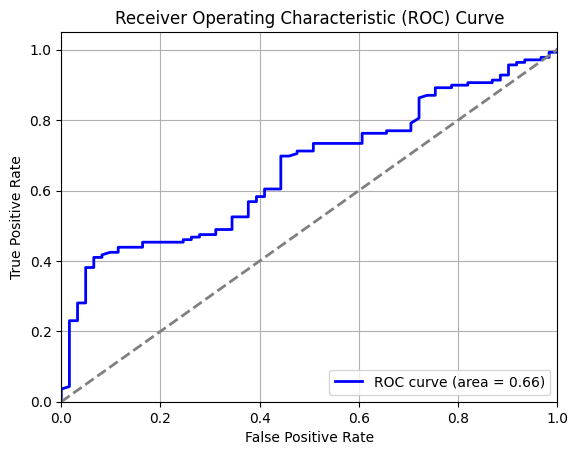

In [ ]:
prob_predictions = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, prob_predictions)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Initialize buy/sell points
df['signal'] = 0
df['signal'][df['compound'] > 0] = 1  # Buy signal
df['signal'][df['compound'] == 0] = -1  # Sell signal

# Carry forward the last signal if no signal on the current day
df['position'] = df['signal'].replace(to_replace=0, method='ffill')


<ipython-input-178-a8eb7664b859>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][df['compound'] > 0] = 1  # Buy signal
<ipython-input-178-a8eb7664b859>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][df['compound'] == 0] = -1  # Sell signal


In [ ]:
# Initial capital
initial_capital = 10000
shares = 0
capital = initial_capital
portfolio_value = []
trade_results = []

# Iterate through the DataFrame to simulate trading
for index, row in df.iterrows():
    if row['position'] == 1 and shares == 0:  # Buy
        shares = capital / row['Close']
        capital = 0
        buy_price = row['Close']
        trade_results.append(0)
    elif row['position'] == -1 and shares > 0:  # Sell
        capital = shares * row['Close']
        shares = 0
        trade_results[-1] = row['Close'] - buy_price
    portfolio_value.append(capital + shares * row['Close'])

df['portfolio_value'] = portfolio_value

# Calculate returns
df['daily_return'] = df['portfolio_value'].pct_change().fillna(0)
df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1
final_portfolio_value = df['portfolio_value'].iloc[-1]
total_return = df['cumulative_return'].iloc[-1]

print(df[['Close', 'compound', 'signal', 'portfolio_value', 'cumulative_return']])
print("Final Portfolio Value: ", final_portfolio_value)
print("Total Return: ", total_return)

         Close  compound  signal  portfolio_value  cumulative_return
0    16.789835    0.4215       1     10000.000000           0.000000
1    16.613411    0.0000      -1      9894.922120          -0.010508
2    16.819241    0.0000      -1      9894.922120          -0.010508
3    16.956459    0.4939       1      9894.922120          -0.010508
4    16.476191    0.0000      -1      9614.662003          -0.038534
..         ...       ...     ...              ...                ...
991   5.169486    0.0000      -1      7986.857869          -0.201314
992   5.222462    0.6249       1      7986.857869          -0.201314
993   5.222462    0.5267       1      7986.857869          -0.201314
994   5.222462    0.4404       1      7986.857869          -0.201314
995   5.071239    0.1779       1      7755.589452          -0.224441

[996 rows x 5 columns]
Final Portfolio Value:  7755.589451895375
Total Return:  -0.2244410548104635


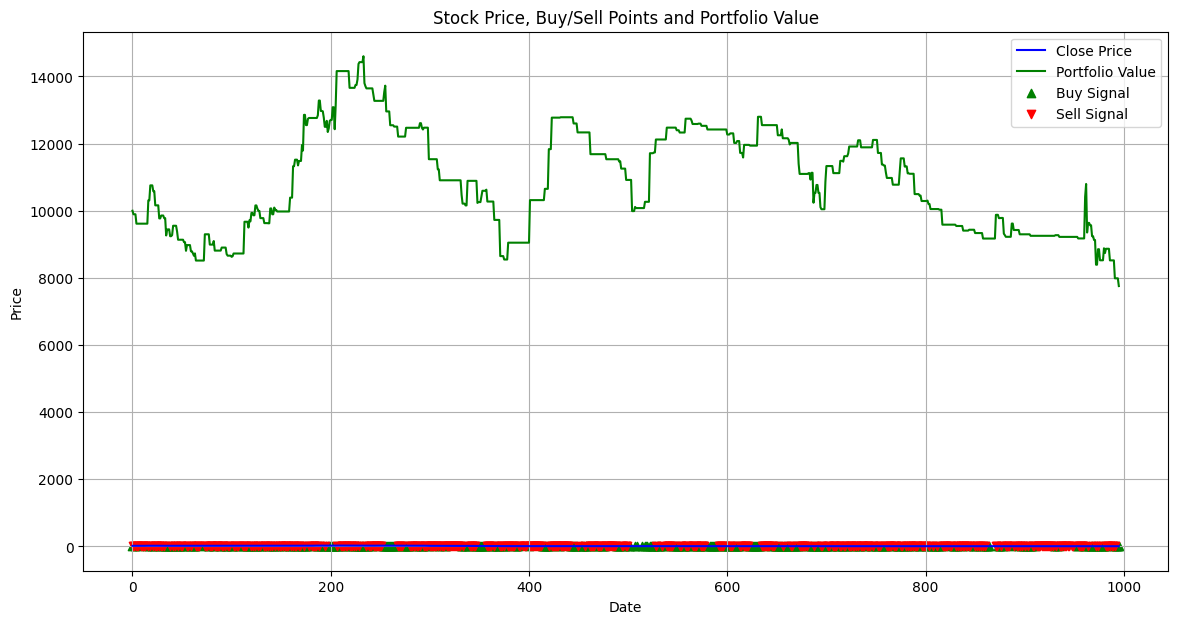

In [ ]:
# Plot close prices and portfolio value with buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['portfolio_value'], label='Portfolio Value', color='green')

# Mark buy/sell signals
buy_signals = df[df['signal'] == 1]
sell_signals = df[df['signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal')

plt.title('Stock Price, Buy/Sell Points and Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Calculate returns
df['daily_return'] = df['portfolio_value'].pct_change().fillna(0)
df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1
final_portfolio_value = df['portfolio_value'].iloc[-1]
total_return = df['cumulative_return'].iloc[-1]
print("Total Return: ", total_return)

Total Return:  -0.2244410548104635


In [ ]:
# Sharpe ratio
risk_free_rate = 0.02 # Example risk-free rate
annualized_return = df['daily_return'].mean() * 252  # Assuming 252 trading days in a year
annualized_volatility = df['daily_return'].std() * np.sqrt(252)
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
print("Sharpe Ratio: ", sharpe_ratio)

Sharpe Ratio:  -0.14926444808677122


In [ ]:
# Maximum drawdown
df['peak'] = df['portfolio_value'].cummax()
df['drawdown'] = (df['portfolio_value'] - df['peak']) / df['peak']
max_drawdown = df['drawdown'].min()
print("Maximum Drawdown: ", max_drawdown)

Maximum Drawdown:  -0.46891729600719656


In [ ]:
# Number of trades executed
number_of_trades = len(trade_results)
print("Number of Trades: ", number_of_trades)

Number of Trades:  165


In [ ]:
# Win ratio
win_ratio = len([result for result in trade_results if result > 0]) / len(trade_results) if number_of_trades > 0 else np.nan
print("Win Ratio: ", win_ratio)

Win Ratio:  0.28484848484848485
